In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df = pd.read_csv('winequality-red.csv')

In [40]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [87]:
df.shape

(1599, 12)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [42]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [45]:
df['quality'].value_counts()

,count
quality,
5,681
6,638
7,199
4,53
8,18
3,10


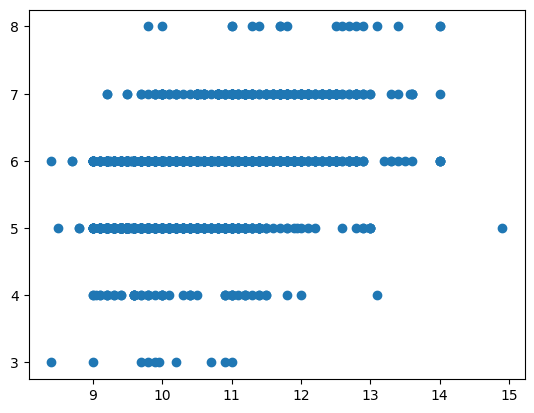

In [43]:
plt.scatter(df['alcohol'], df['quality'])

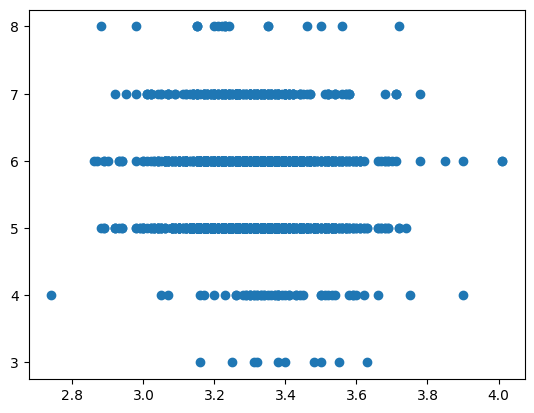

In [44]:
plt.scatter(df['pH'], df['quality'])

<Axes: >

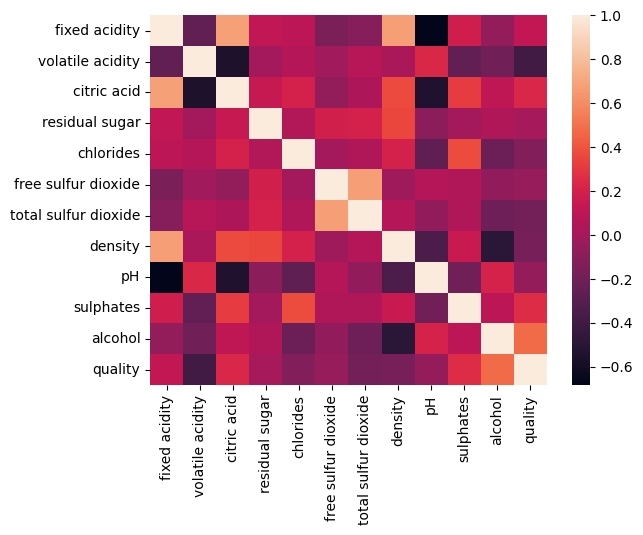

In [90]:
sns.heatmap(df.corr())

<ipython-input-47-667b412bb1d7>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df['fixed acidity'], df['citric acid'], cmap='viridis', alpha=0.4, color='green')


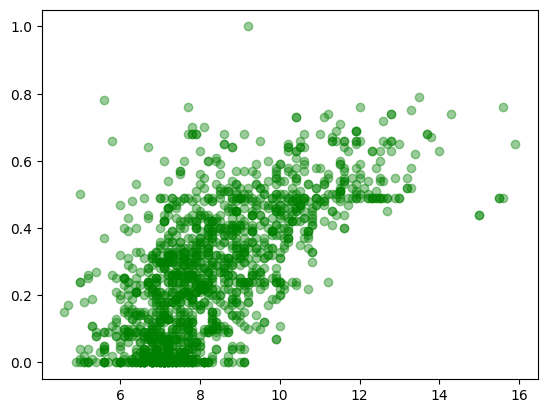

In [47]:
plt.scatter(df['fixed acidity'], df['citric acid'], cmap='viridis', alpha=0.4, color='green')

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
scaler = StandardScaler()

In [92]:
df['quality'] = df['quality'].apply(lambda x: 1 if x > 6.5 else 0)

In [93]:
X = df.drop('quality', axis=1)
y = df['quality']

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [96]:
X_train.shape, X_test.shape

((1439, 11), (160, 11))

In [97]:
from sklearn.preprocessing import StandardScaler

In [98]:
scaler = StandardScaler()

In [99]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [100]:
from sklearn.metrics import confusion_matrix, classification_report

In [101]:
def model_prediction(model, X_train, y_train, X_test, y_test):
  model_1 = model
  model.fit(X_train, y_train)
  train_score = model.score(X_train, y_train)
  test_score = model.score(X_test, y_test)
  print(f'Train Score: {train_score}')
  print(f'Test Score: {test_score}')
  y_pred = model.predict(X_test)
  print("\nConfusion Matrix: \n",confusion_matrix(y_test, y_pred))
  print("\nClassification Report: \n",classification_report(y_test, y_pred))

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [103]:
model_prediction(LogisticRegression(max_iter=1000), X_train, y_train, X_test, y_test)

Train Score: 0.8825573314801946
Test Score: 0.8625

Confusion Matrix: 
 [[133   5]
 [ 17   5]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.96      0.92       138
           1       0.50      0.23      0.31        22

    accuracy                           0.86       160
   macro avg       0.69      0.60      0.62       160
weighted avg       0.83      0.86      0.84       160



In [104]:
model_prediction(SVC(), X_train, y_train, X_test, y_test)

Train Score: 0.8985406532314107
Test Score: 0.8625

Confusion Matrix: 
 [[135   3]
 [ 19   3]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.98      0.92       138
           1       0.50      0.14      0.21        22

    accuracy                           0.86       160
   macro avg       0.69      0.56      0.57       160
weighted avg       0.82      0.86      0.83       160



In [105]:
model_prediction(DecisionTreeClassifier(), X_train, y_train, X_test, y_test)

Train Score: 1.0
Test Score: 0.90625

Confusion Matrix: 
 [[131   7]
 [  8  14]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.95      0.95       138
           1       0.67      0.64      0.65        22

    accuracy                           0.91       160
   macro avg       0.80      0.79      0.80       160
weighted avg       0.90      0.91      0.91       160



In [106]:
model_prediction(RandomForestClassifier(), X_train, y_train, X_test, y_test)

Train Score: 1.0
Test Score: 0.9

Confusion Matrix: 
 [[134   4]
 [ 12  10]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94       138
           1       0.71      0.45      0.56        22

    accuracy                           0.90       160
   macro avg       0.82      0.71      0.75       160
weighted avg       0.89      0.90      0.89       160

